In [41]:
%matplotlib inline
import math, sys, os, numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision = 4, linewidth = 100)

In [42]:
def lin(a, b, x): return a * x + b

In [43]:
a = 3.
b = 8.

In [44]:
n = 30
x = random(n)
y = lin(a, b, x)

In [45]:
x

array([ 0.7751,  0.152 ,  0.9242,  0.8079,  0.9868,  0.6817,  0.4245,  0.1403,  0.0863,  0.0435,
        0.9433,  0.0061,  0.6681,  0.1758,  0.1082,  0.6293,  0.1694,  0.5487,  0.0044,  0.3634,
        0.2501,  0.1902,  0.6931,  0.3134,  0.9977,  0.8537,  0.9068,  0.5717,  0.4492,  0.5109])

In [46]:
y

array([ 10.3254,   8.4559,  10.7726,  10.4237,  10.9605,  10.0452,   9.2734,   8.421 ,   8.2588,
         8.1306,  10.8298,   8.0183,  10.0042,   8.5274,   8.3245,   9.8879,   8.5081,   9.646 ,
         8.0133,   9.0902,   8.7502,   8.5706,  10.0793,   8.9403,  10.993 ,  10.561 ,  10.7204,
         9.7152,   9.3475,   9.5328])

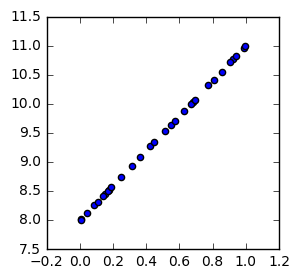

In [47]:
plt.scatter(x, y)

In [48]:
# sum of squared errors
def sse(y, y_pred): return ((y - y_pred)**2).sum()
# loss is a math function which should be high if ur guess is bad
# and it should be low if ur guess is good
def loss(y, a, b, x): return sse(y, lin(a, b, x))
def avg_loss(y, a, b, x): return np.sqrt(loss(y, a, b, x) / n)

In [49]:
a_guess = -1
b_guess = 1
avg_loss(y, a_guess, b_guess, x)

9.0102

In [50]:
lr = 0.01
# dirivitive of the lost function with respect to your weights
# d[(y - (a * x + b))**2, b] = 2 (b + a x - y) = 2(y_pred - y)
# d[(y - (a * x + b))**2, a] = 2 x (b + a x - y) = x * dy / db

In [51]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x * dydb
    a_guess -= lr * dyda.mean()
    b_guess -= lr * dydb.mean()

In [52]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x, y)
line, = plt.plot(x, lin(a_guess, b_guess, x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess, b_guess, x))
    for i in range(20): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani

In [53]:
a_guess

2.9325

In [54]:
b_guess

8.0353